# Matplotlib 기초 강의

### 학습 목표

- Matplotlib의 기본 개념과 사용법을 이해한다.
- 다양한 종류의 그래프를 그리고 커스터마이징할 수 있다.
- 데이터 시각화의 중요성을 인식하고 효과적으로 데이터를 표현할 수 있다.

## 1. Matplotlib 소개 및 설정

Matplotlib는 Python의 대표적인 데이터 시각화 라이브러리입니다.

다양한 그래프와 차트를 생성할 수 있어 데이터 분석과 과학 연구에 널리 사용됩니다.

### 학습 목표

- Matplotlib를 임포트하고 기본 설정을 할 수 있다.
- 한글 폰트를 설정하여 한글이 포함된 그래프를 그릴 수 있다.

먼저 필요한 라이브러리를 import하고 한글 폰트를 설정해보겠습니다.

In [ ]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

manager = fm.FontManager()
fm.fontManager.ttflist = manager.ttflist
plt.rc('font', family='NanumBarunGothic')

# Matplotlib 버전 확인
import matplotlib
print(matplotlib.__version__)

3.7.1


이 코드는 Matplotlib와 NumPy를 import하고, 한글 폰트를 'NanumBarunGothic'으로 설정한 뒤, Matplotlib의 버전을 출력합니다.

## 2. 기본 선 그래프

### 학습 목표

- 기본적인 선 그래프를 그릴 수 있다.
- 그래프의 제목, 축 레이블, 범례 등을 설정할 수 있다.

### 간단한 선 그래프

가장 기본적인 선 그래프를 그려보겠습니다.

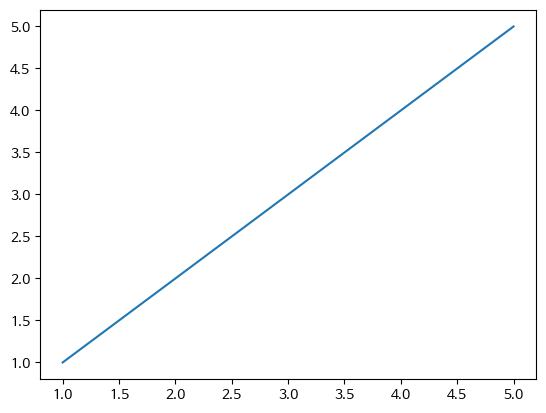

In [ ]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
plt.plot(x, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


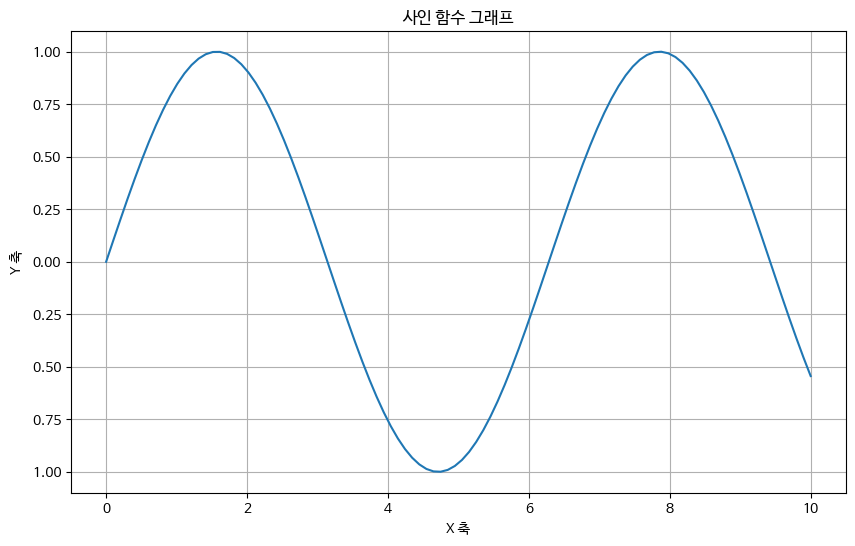

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('사인 함수 그래프')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.grid(True)
plt.show()

이 코드는 0부터 10까지의 x 값에 대한 사인 함수를 그립니다.

`plt.figure(figsize=(10, 6))`로 그래프의 크기를 설정하고,

`plt.title()`, `plt.xlabel()`, `plt.ylabel()`로 제목과 축 이름을 지정합니다.

### 다중 선 그래프

하나의 그래프에 여러 선을 그리는 방법을 알아보겠습니다.

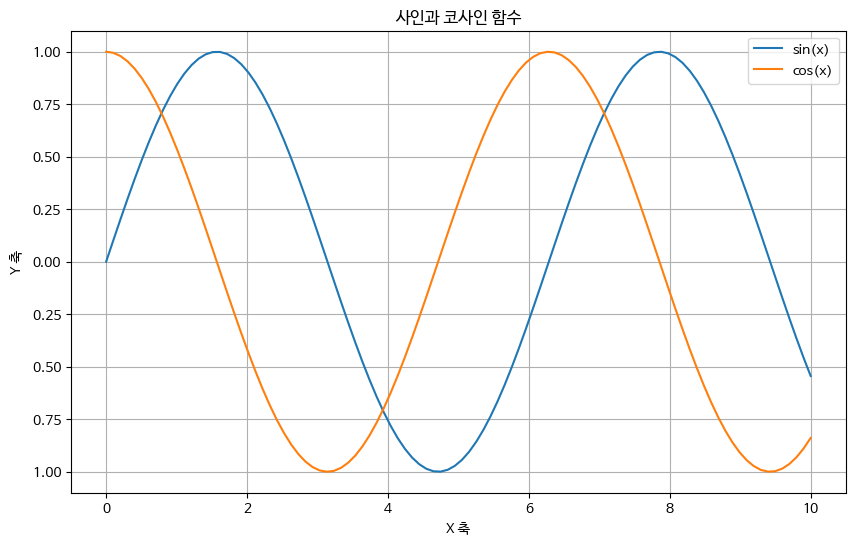

In [ ]:
y2 = np.cos(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.title('사인과 코사인 함수')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.legend()
plt.grid(True)
plt.show()

이 예제에서는 사인 함수와 코사인 함수를 같은 그래프에 그립니다.

`label` 매개변수로 각 선의 레이블을 지정하고, `plt.legend()`로 범례를 표시합니다.

## 3. 산점도

### 학습 목표

- 산점도를 그리고 데이터 포인트의 특성을 시각화할 수 있다.
- 그래프의 투명도와 색상을 조절할 수 있다.

실제 데이터를 사용한 산점도 예제를 살펴보겠습니다.

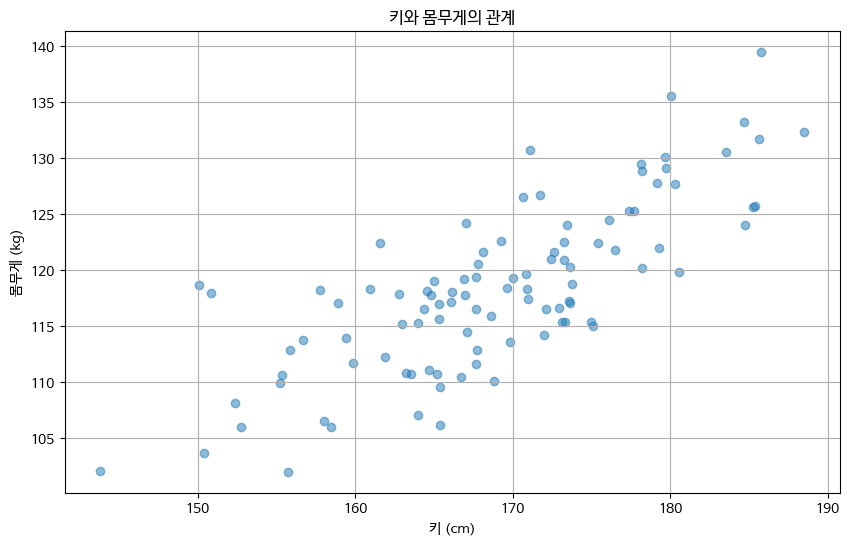

In [ ]:
np.random.seed(42)
height = np.random.normal(170, 10, 100)  # 평균 170cm, 표준편차 10cm의 100개 데이터
weight = height * 0.7 + np.random.normal(0, 5, 100)  # 키와 관련된 몸무게 데이터

plt.figure(figsize=(10, 6))
plt.scatter(height, weight, alpha=0.5)
plt.title('키와 몸무게의 관계')
plt.xlabel('키 (cm)')
plt.ylabel('몸무게 (kg)')
plt.grid(True)
plt.show()

이 코드는 키와 몸무게 데이터를 생성하고 산점도로 표현합니다.

`alpha=0.5`로 점의 투명도를 설정하여 데이터 밀집도를 시각적으로 표현합니다.

## 4. 막대 그래프

### 학습 목표

- 범주형 데이터를 막대 그래프로 표현할 수 있다.
- 막대 위에 값을 표시하는 방법을 익힌다.

범주형 데이터를 표현하는 막대 그래프를 그려보겠습니다.

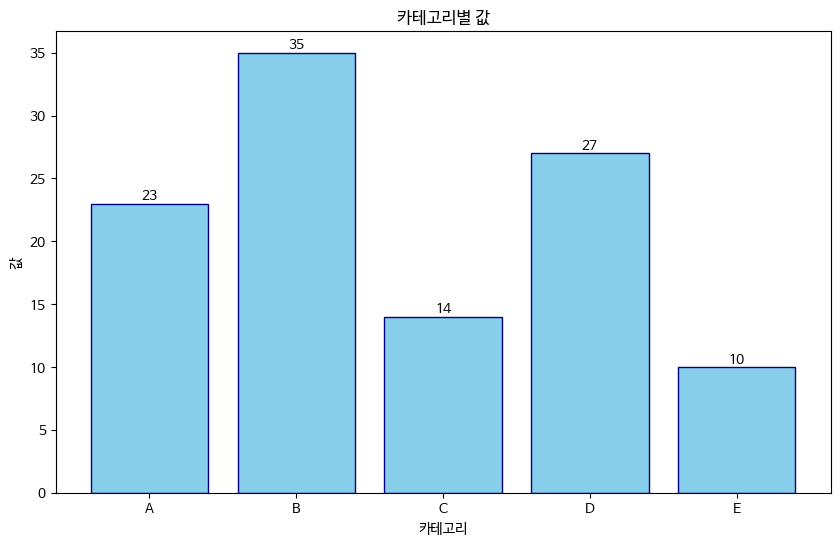

In [ ]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 35, 14, 27, 10]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color='skyblue', edgecolor='navy')
plt.title('카테고리별 값')
plt.xlabel('카테고리')
plt.ylabel('값')

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}', ha='center', va='bottom')

plt.show()

이 예제는 각 카테고리별 값을 막대 그래프로 표현합니다.

추가로 각 막대 위에 해당 값을 텍스트로 표시합니다.

## 5. 선형 회귀 예시

선형 회귀를 시각화하는 예시를 추가해보겠습니다.

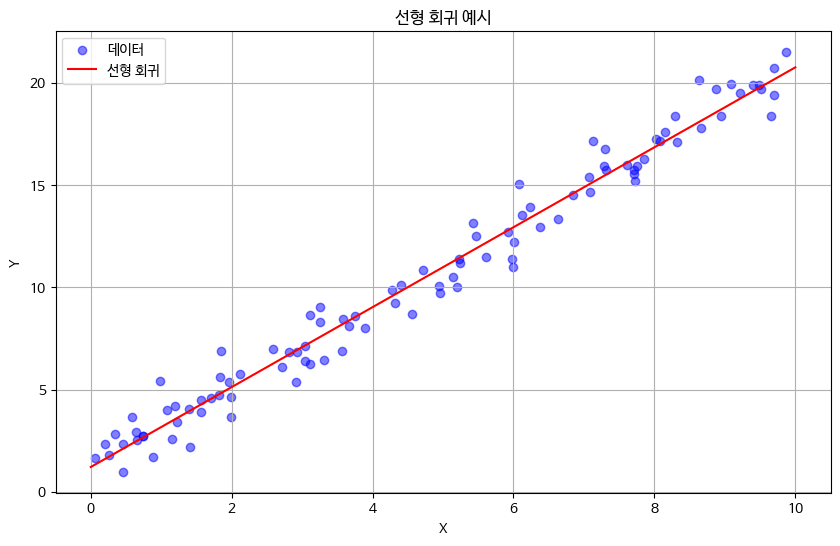

기울기: 1.95
y절편: 1.22


In [ ]:
from sklearn.linear_model import LinearRegression

# 데이터 생성
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='데이터')
plt.plot(X_test, y_pred, color='red', label='선형 회귀')
plt.title('선형 회귀 예시')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print(f"기울기: {model.coef_[0][0]:.2f}")
print(f"y절편: {model.intercept_[0]:.2f}")

이 예제는 랜덤 데이터를 생성하고, 이를 바탕으로 선형 회귀 모델을 학습합니다. 그 후 원본 데이터와 회귀선을 함께 그래프로 표현합니다.

## 6. 파이 차트


### 학습 목표

- 파이 차트를 사용하여 전체에 대한 부분의 비율을 표현할 수 있다.
- 파이 차트의 색상과 레이블을 설정할 수 있다.

파이 차트는 전체에 대한 각 부분의 비율을 원형으로 표현하는 그래프입니다.

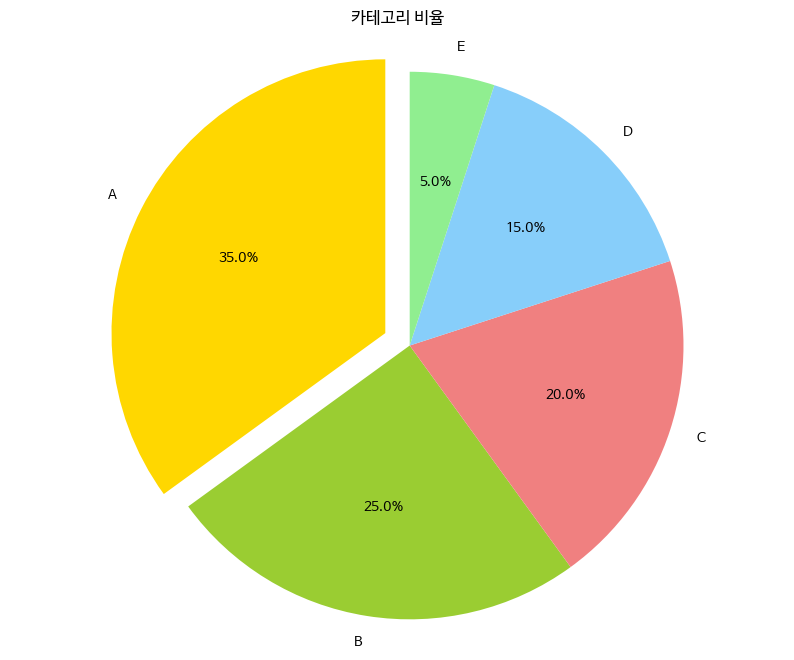

In [ ]:
sizes = [35, 25, 20, 15, 5]
labels = ['A', 'B', 'C', 'D', 'E']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0, 0, 0)  # 'A' 조각만 돌출

plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 원형으로 보이게 설정
plt.title('카테고리 비율')
plt.show()

이 코드는 다섯 개의 카테고리에 대한 파이 차트를 생성합니다.

`explode` 매개변수를 사용하여 첫 번째 조각을 돌출시키고, `autopct`로 각 조각의 퍼센트를 표시합니다.

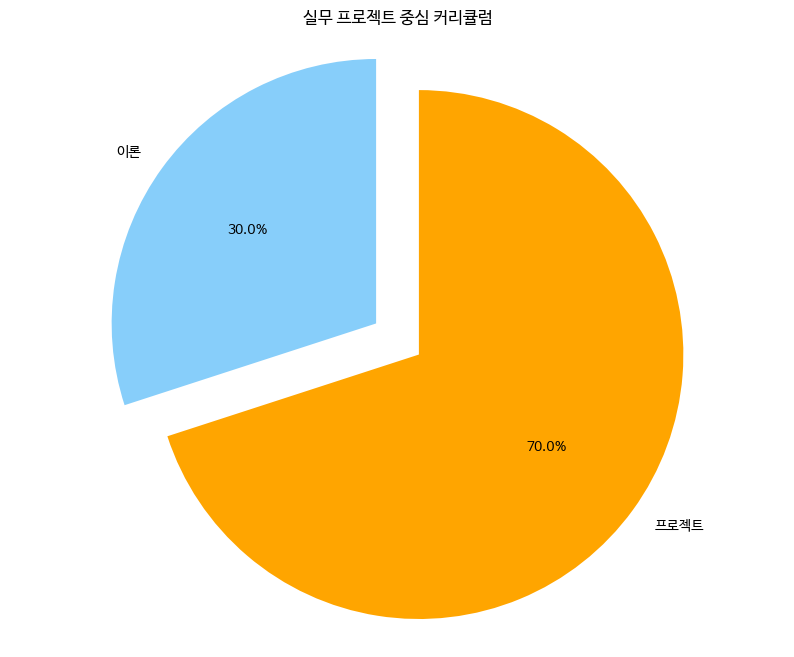

In [ ]:
sizes = [30, 70]
labels = ['이론', '프로젝트']
colors = ['lightskyblue', 'orange']
explode = (0.1, 0.1)

plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 원형으로 보이게 설정
plt.title('실무 프로젝트 중심 커리큘럼')
plt.show()

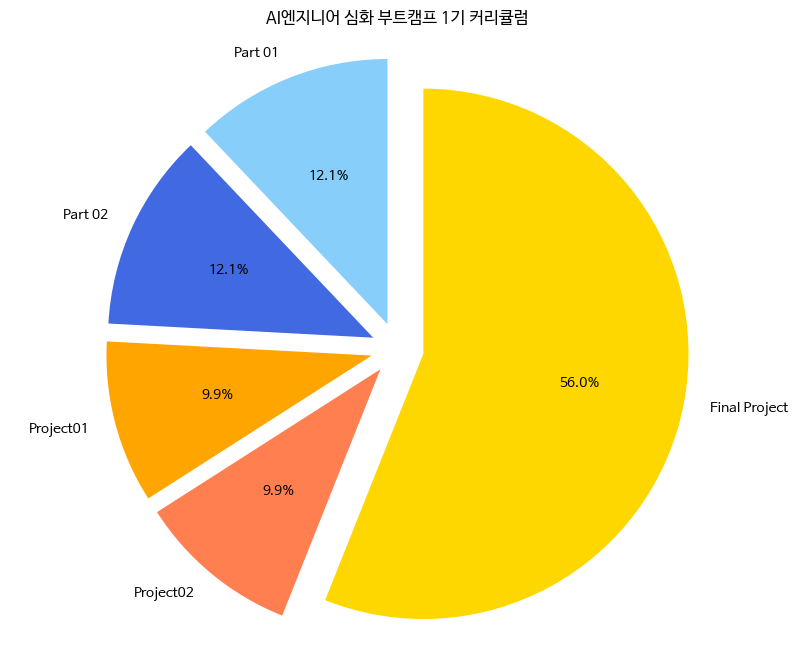

In [ ]:
import matplotlib.pyplot as plt

# Data
theory_total = 78
project_total = 245
part01_hours = theory_total / 2
part02_hours = theory_total / 2
project01_hours = 32
project02_hours = 32
final_project_hours = project_total - project01_hours - project02_hours

# Labels and sizes for the pie chart
labels = ['Part 01', 'Part 02', 'Project01', 'Project02', 'Final Project']
sizes = [part01_hours, part02_hours, project01_hours, project02_hours, final_project_hours]
colors = ['lightskyblue', 'royalblue', 'orange', 'coral', 'gold']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Explode all slices

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('AI엔지니어 심화 부트캠프 1기 커리큘럼')
plt.show()

## 7. 히스토그램

### 학습 목표

- 히스토그램을 사용하여 데이터의 분포를 시각화할 수 있다.
- 히스토그램의 구간(bin) 수를 조절할 수 있다.

히스토그램은 데이터의 분포를 시각화하는 데 사용되는 그래프입니다.

데이터를 일정한 구간으로 나누고, 각 구간에 속하는 데이터의 빈도를 막대로 표현합니다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


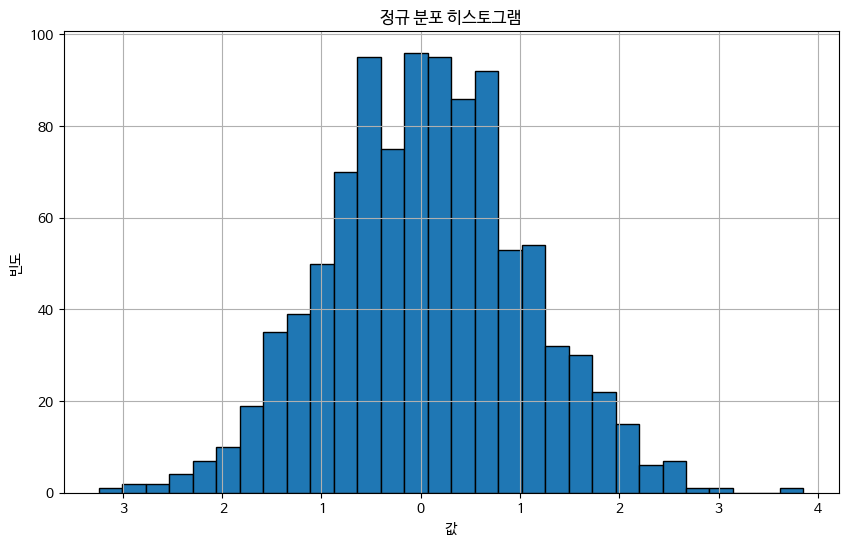

In [ ]:
data = np.random.randn(1000)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.title('정규 분포 히스토그램')
plt.xlabel('값')
plt.ylabel('빈도')
plt.grid(True)
plt.show()

이 예제는 표준 정규 분포를 따르는 1000개의 랜덤 데이터를 생성하고, 이를 히스토그램으로 표현합니다.

`bins=30`은 데이터를 30개의 구간으로 나눈다는 의미입니다.

## 8. 등고선 그래프

등고선 그래프는 3차원 데이터를 2차원 평면에 표현하는 방법 중 하나입니다.

높이가 같은 지점들을 연결한 선으로 표현합니다.

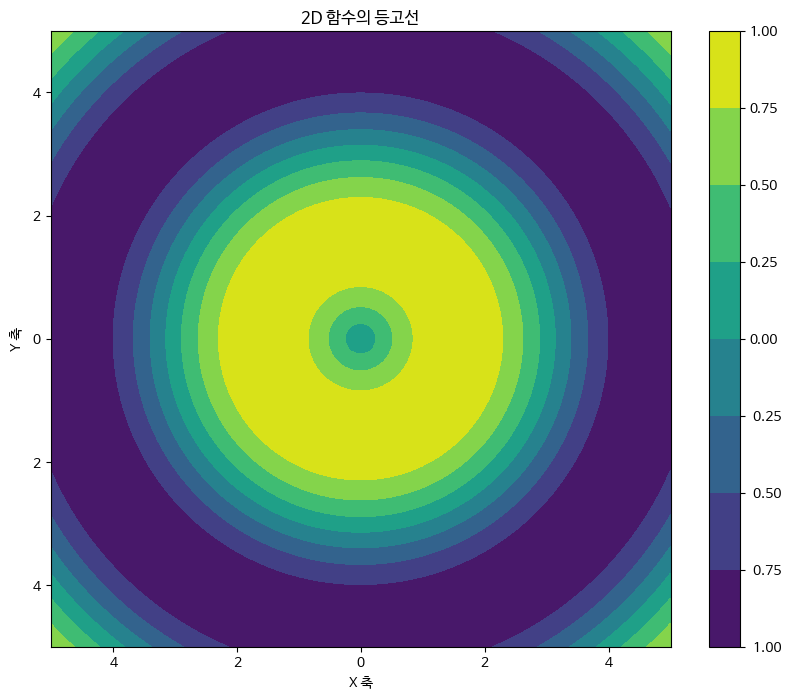

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(contour)
plt.title('2D 함수의 등고선')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()

이 예제는 3D 표면 그래프를 그립니다. `plot_surface` 함수를 사용하여 3D 표면을 그리고, 컬러맵을 적용하여 높이를 색상으로도 표현합니다.

## 9. 3D 그래프

### 학습 목표

- 3D 그래프를 생성하고 표현할 수 있다.
- 3D 그래프의 축과 컬러맵을 설정할 수 있다.

3D 그래프는 3차원 데이터를 직접적으로 표현할 수 있는 방법입니다.

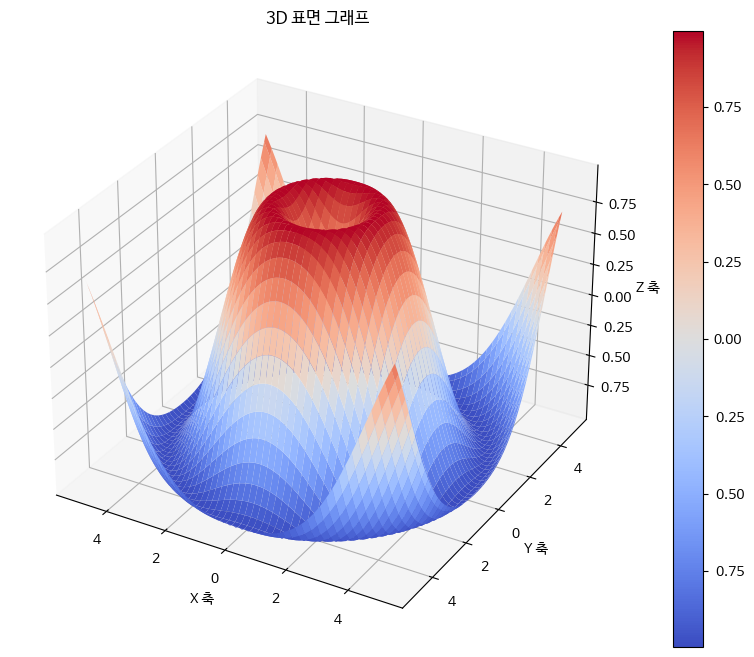

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')
fig.colorbar(surf)

ax.set_title('3D 표면 그래프')
ax.set_xlabel('X 축')
ax.set_ylabel('Y 축')
ax.set_zlabel('Z 축')

plt.show()

이 예제는 앞서 등고선 그래프에서 사용한 것과 같은 함수를 3D 표면 그래프로 표현합니다.

`plot_surface 함수`를 사용하여 `3D 표면`을 그리고, 컬러맵을 적용하여 높이를 색상으로도 표현합니다.

## 10. 스타일 및 테마


Matplotlib는 다양한 그래프 스타일을 제공합니다.

이를 통해 그래프의 전체적인 모양을 쉽게 변경할 수 있습니다.

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


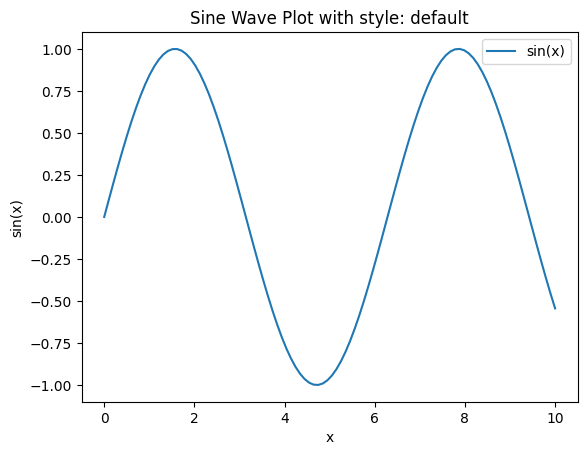

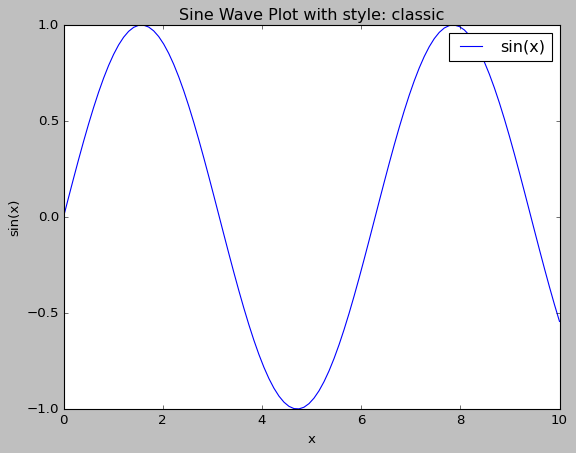

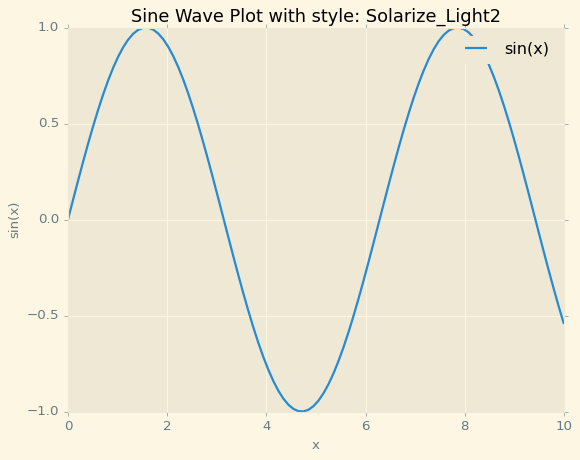

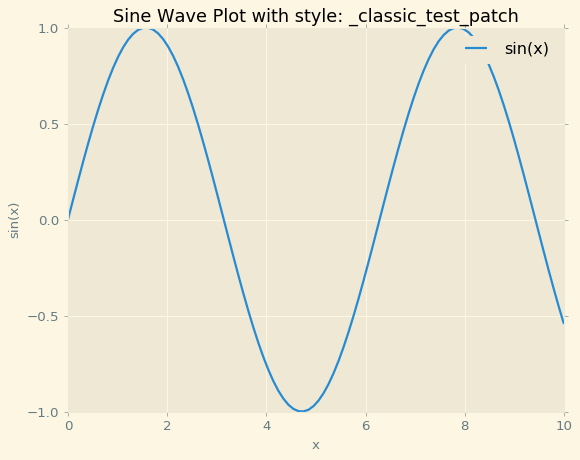

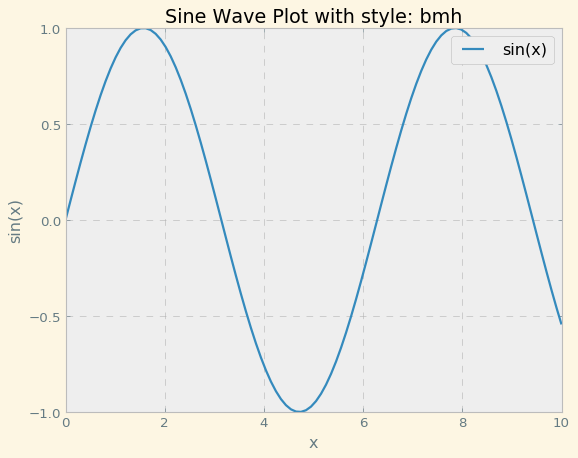

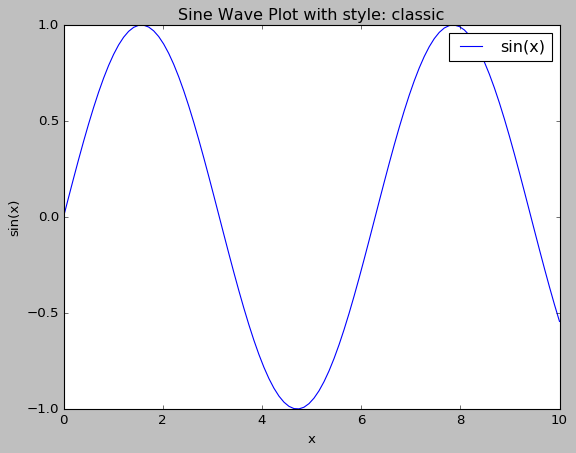

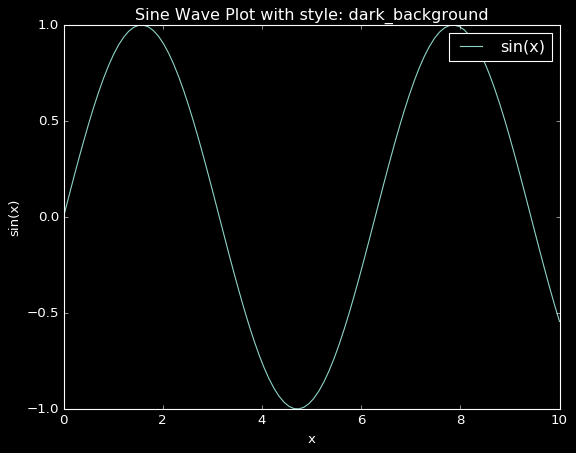

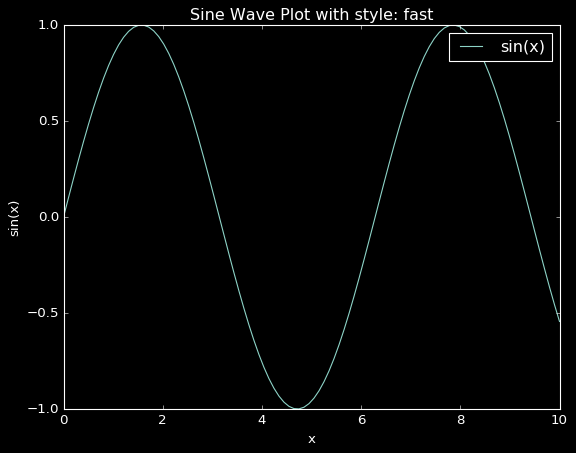

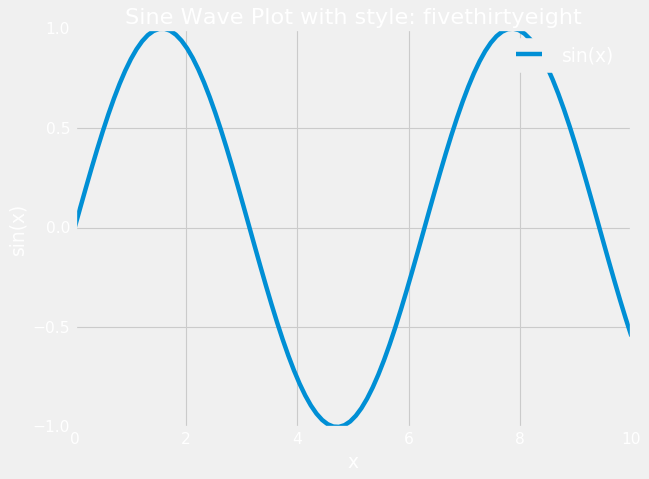

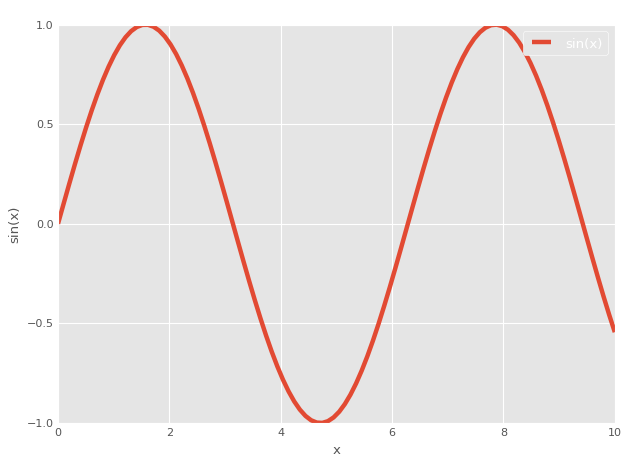

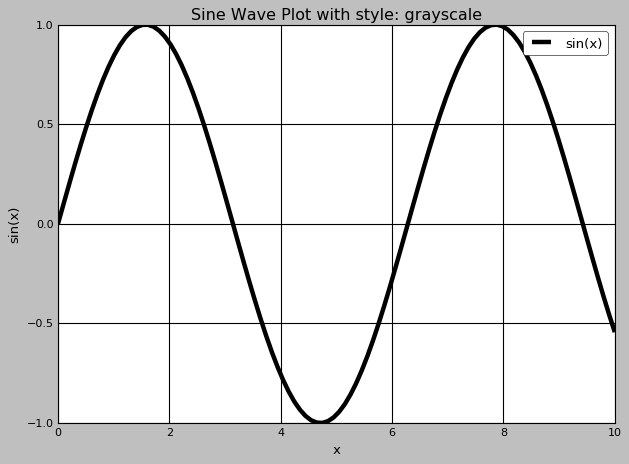

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


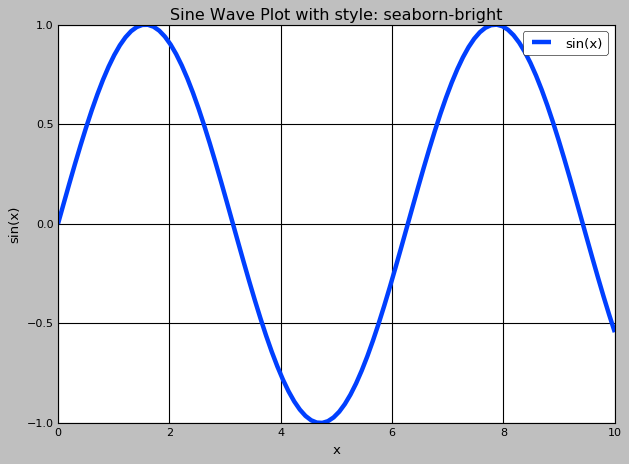

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


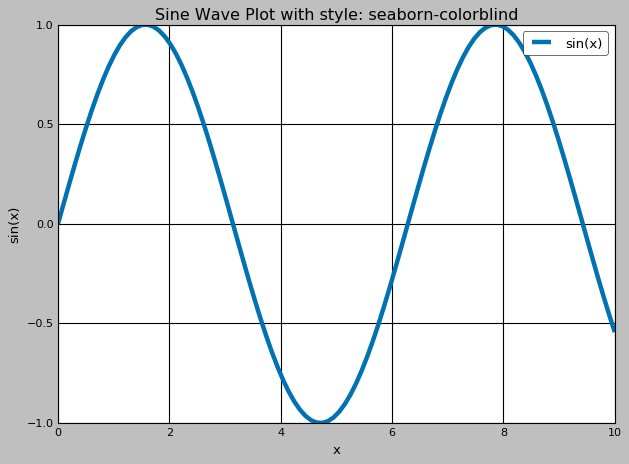

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


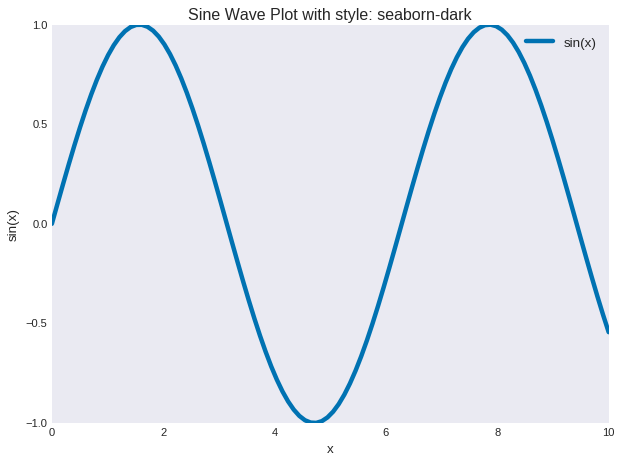

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


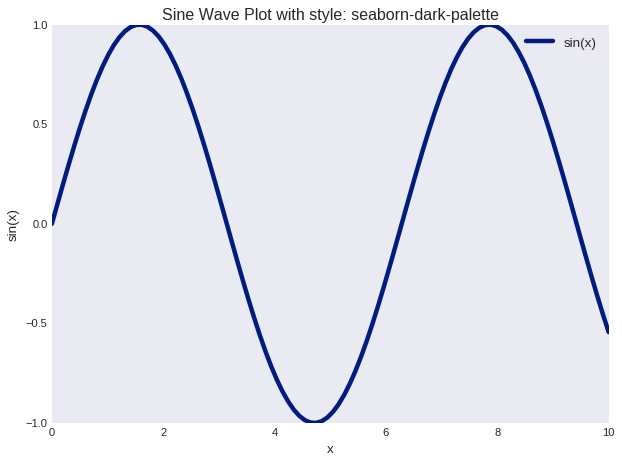

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


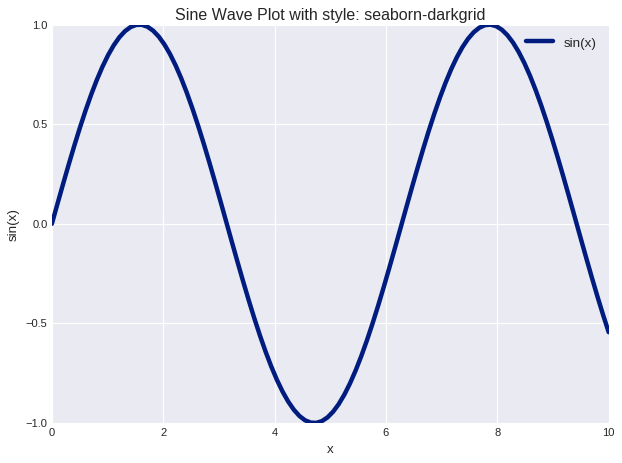

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


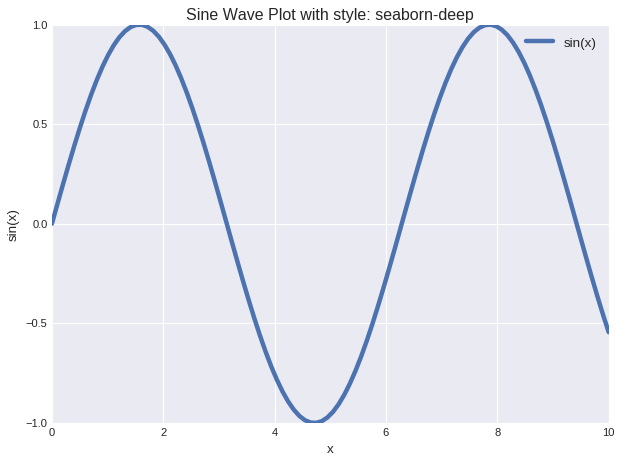

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


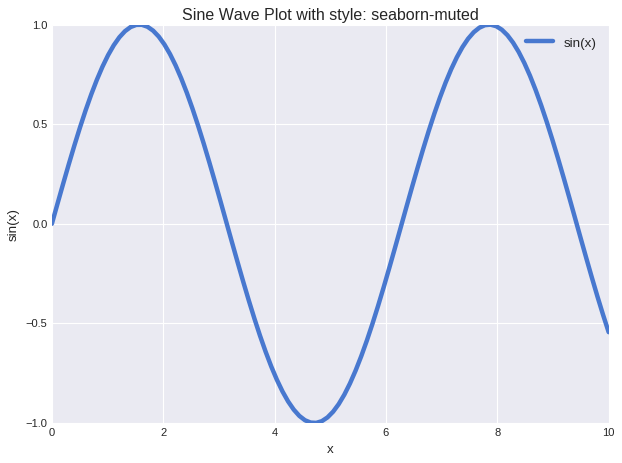

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


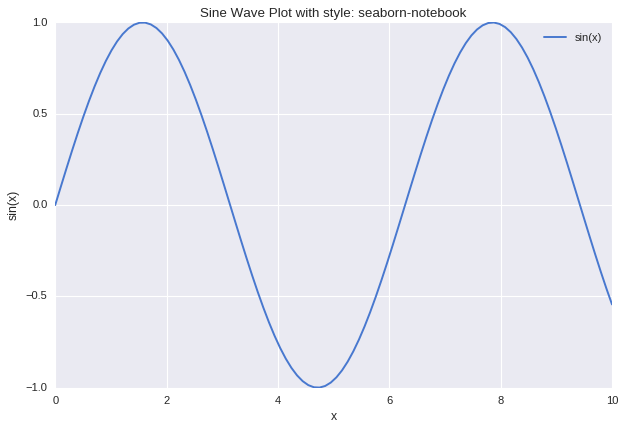

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


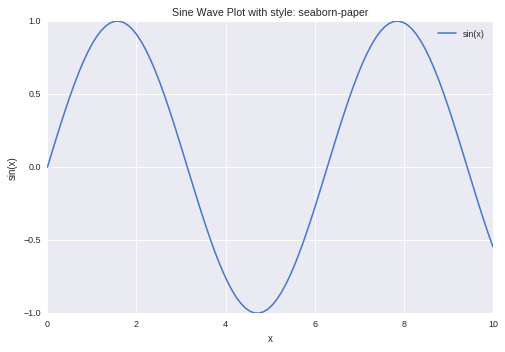

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


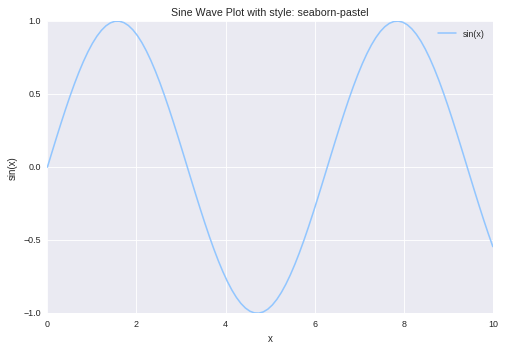

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


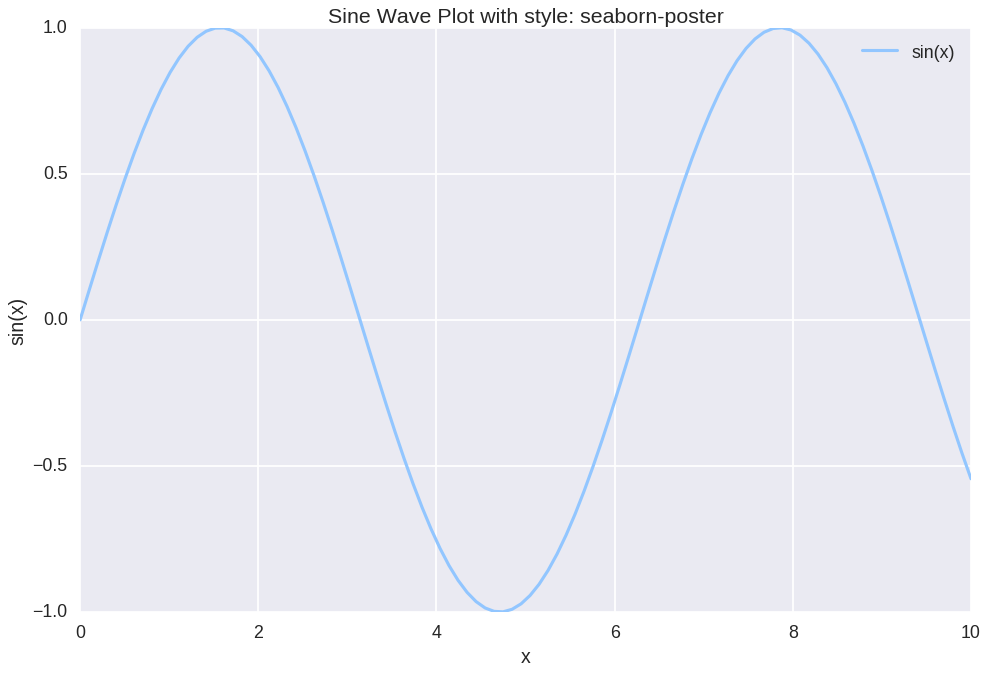

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


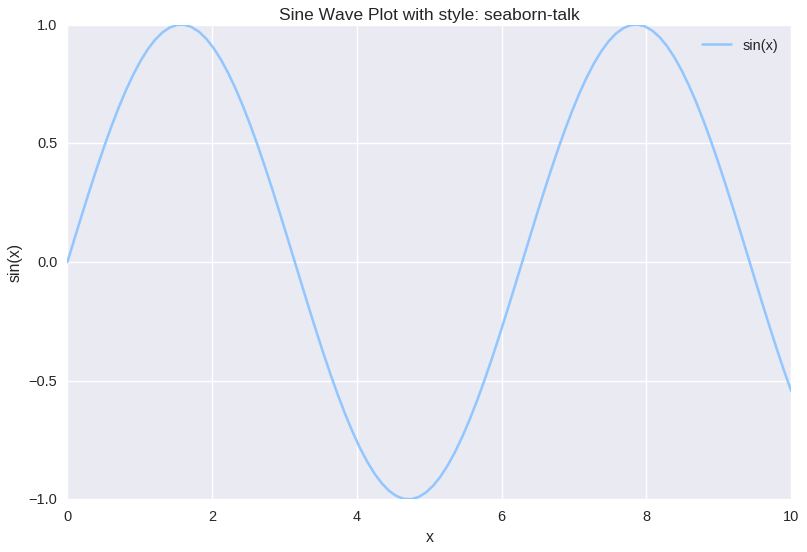

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


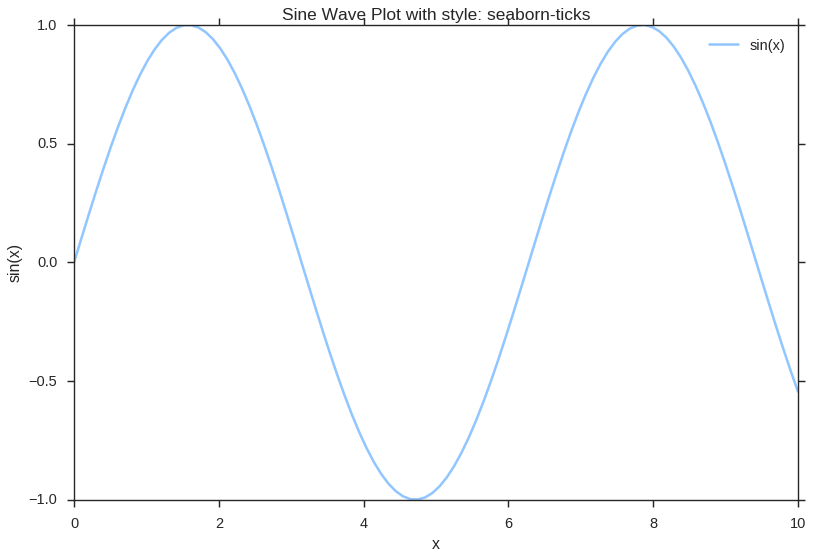

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


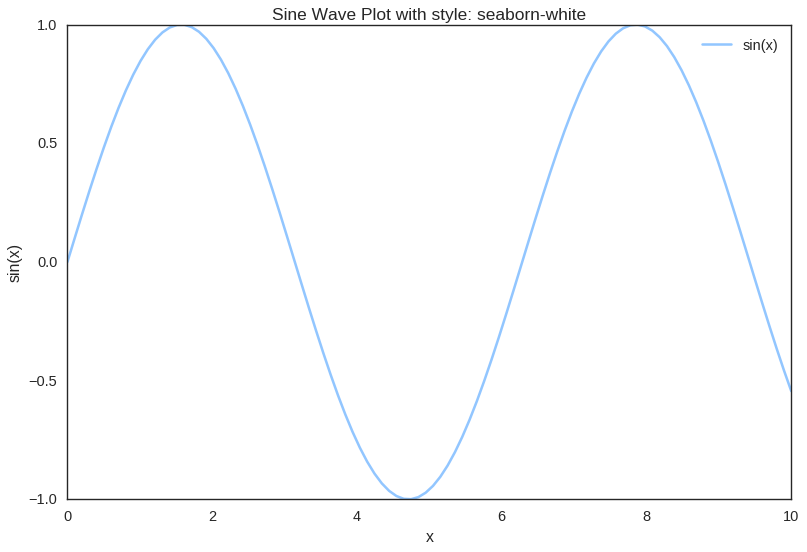

<ipython-input-15-9b5e552904de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


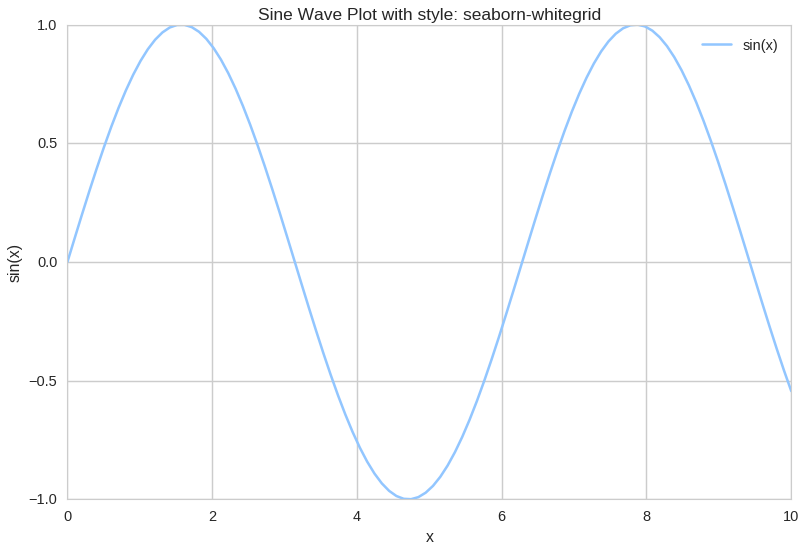

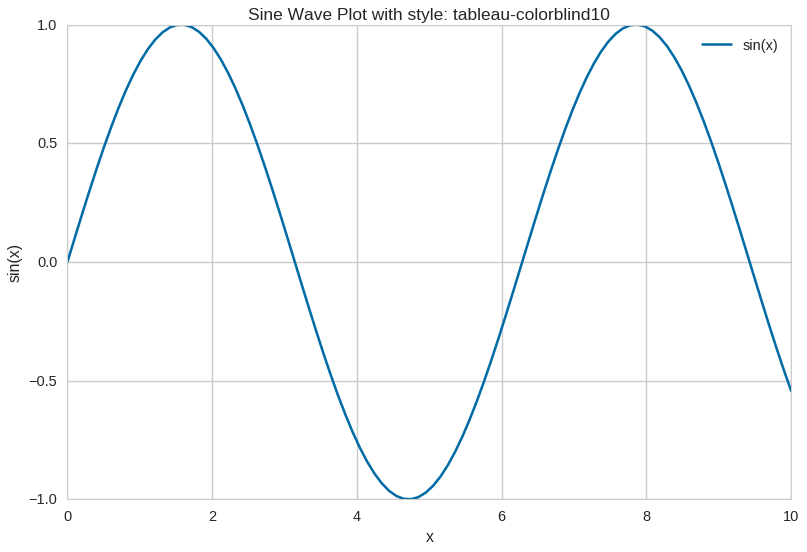

In [ ]:
# Print available styles
print(plt.style.available)

# Choose a style from the list
# styles = ['seaborn', 'ggplot', 'bmh', 'fivethirtyeight', 'grayscale']
styles = ['default', 'classic', 'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
for style in styles:
    # Apply the style
    plt.style.use(style)

    # Create sample data
    x = np.linspace(0, 10, 100)
    y = np.sin(x)

    # Create the plot
    plt.plot(x, y, label='sin(x)')

    # Add title and labels
    plt.title('Sine Wave Plot with style: ' + style)
    plt.xlabel('x')
    plt.ylabel('sin(x)')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

이 코드는 몇 가지 대표적인 스타일을 적용하여 동일한 사인 함수 그래프를 그립니다.

각 스타일마다 그래프의 색상, 격자, 폰트 등이 다르게 적용되는 것을 볼 수 있습니다.

## 11. 애니메이션

### 학습 목표

- Matplotlib를 사용하여 간단한 애니메이션을 만들 수 있다.
- 애니메이션을 GIF 파일로 저장할 수 있다.

Matplotlib를 사용하여 간단한 애니메이션을 만들어보겠습니다.

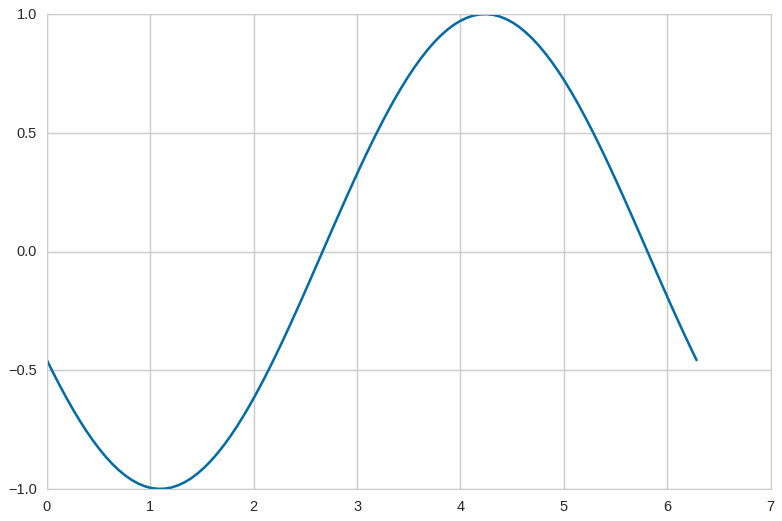

In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.linspace(0, 2*np.pi, 100)
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x + i/10))
    return line,

ani = animation.FuncAnimation(fig, animate, frames=100, interval=50, blit=True)
ani.save('sin_function_animation.gif', writer='imagemagick')  # save as GIF, call save on ani object
plt.show()

이 코드는 사인 함수의 그래프를 조금씩 이동시키면서 애니메이션 효과를 만듭니다.

`FuncAnimation 함수`를 사용하여 각 프레임마다 `animate 함수`를 호출하고, 그래프를 업데이트합니다.

## 12. 이미지 처리

Matplotlib를 사용하여 이미지를 표시하고 처리할 수 있습니다.

여기서는 Matplotlib 로고를 불러와 회전시키는 애니메이션을 만들어 보겠습니다.

In [ ]:
!pip install cairosvg
!pip install celluloid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/celluloid.py:50: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  return ArtistAnimation(self._figure, self._photos, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/celluloid.py:50: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  return ArtistAnimation(self._figure, self._photos, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/celluloid.py:50: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  return ArtistAnimation(self._figure, self._photos, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/celluloid.py:50: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  return ArtistAnimation(self._figure, self._photos, *args, **kwargs)
<ipython-input-18-5b277fd56d5a>:31: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  animation.save('matplotlib_logo_rotation.gif', writer='imagemagick

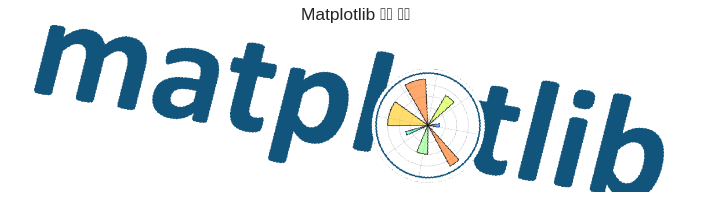

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import requests
from io import BytesIO
import cairosvg
from celluloid import Camera  # import Camera

# 온라인 이미지 불러오기
url = "https://matplotlib.org/_static/logo2.svg"
response = requests.get(url)

# SVG 이미지를 PNG로 변환
img_data = cairosvg.svg2png(bytestring=response.content)
img = Image.open(BytesIO(img_data))

# 애니메이션 설정
fig = plt.figure(figsize=(10, 10))
camera = Camera(fig)  # create a Camera instance

# 이미지 회전 애니메이션
for i in range(0, 360, 10):
    rotated_img = img.rotate(i)  # 이미지 회전
    plt.imshow(rotated_img)  # 회전된 이미지 출력
    plt.axis('off')
    plt.title('Matplotlib 로고 회전')
    camera.snap()  # capture the frame

# 애니메이션 생성 및 출력
animation = camera.animate(interval=50, blit=True)  # create the animation
animation.save('matplotlib_logo_rotation.gif', writer='imagemagick')  # save as GIF
plt.show()

### 결론

이 튜토리얼에서는 Matplotlib를 사용한 다양한 데이터 시각화 방법을 살펴보았습니다.

실제 데이터 분석 과정에서는 이러한 기술들을 조합하여 사용하게 됩니다.

Matplotlib의 공식 문서와 갤러리를 참조하면 더 많은 고급 기능과 사용 사례를 확인할 수 있습니다.

### Reference

- [Matplotlib 공식 문서](https://matplotlib.org/stable/tutorials/index.html)
- [Matplotlib Tutorial](https://kr.matplotlib.net/stable/tutorials/index.html)
- [Matplotlib Tutorial - 파이썬으로 데이터 시각화하기](https://wikidocs.net/book/5011)